In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load university df

In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')
len(university_df)

6441

In [4]:
university_df[:4]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",False,115.5,55783.941620,493,56164.312487,55205.642506,48297.784952,48627.110378,47797.093079
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",False,115.5,56659.816586,680,56950.613563,56164.312487,49056.118257,49307.890531,48627.110378
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",False,126.7,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186
3,6.0,Princeton University,USA,4.0,5,15,7,70,92.6,186131.0,Princeton University,,1 Nassau Hall,Princeton,NJ,08544-0070,34.0,2.0,Christopher L. Eisgruber,President,6092583000,210634501.0,002484665,262700.0,1.0,www.princeton.edu/,,,,www.princeton.edu/admission/financialaid/estim...,registrar.princeton.edu/student-services/veter...,fs.ncaa.org/Docs/newmedia/public/rates/index.html,www.princeton.edu/ods/,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,13.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,15.0,14.0,5.0,14.0,15.0,15.0,15.0,2.0,3.0,2.0,-2,-2.0,45940,1,408,-2.0,34021,Mercer County,3412.0,-

### Threshold number of salaries

27572
26964
129


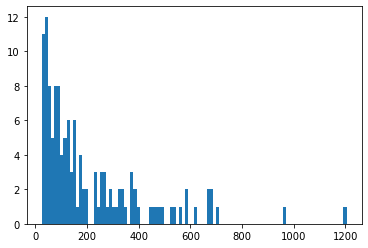

In [5]:
MIN_N_SALARIES = 25
print(university_df.N_SALARIES.sum())
university_df = university_df[university_df.N_SALARIES > MIN_N_SALARIES]
print(university_df.N_SALARIES.sum())
plt.hist(university_df.N_SALARIES, bins = 100);
print(len(university_df))

### Load metro salaries

In [6]:
metro_salary_df = pd.read_csv(DATA_DIR/ 'non-postdoc-salary'/ 'MSA_M2020_dl.csv')
non_metro_salary_df = pd.read_csv(DATA_DIR/ 'non-postdoc-salary'/ 'BOS_M2020_dl.csv')

In [7]:
metro_salary_df = pd.concat([metro_salary_df, non_metro_salary_df])

In [8]:
np.unique([i for i in metro_salary_df.AREA_TITLE.values if 'Boston' in i])

array(['Boston-Cambridge-Nashua, MA-NH'], dtype='<U30')

In [9]:
#metro_salary_df = metro_salary_df[metro_salary_df.AREA.isin(university_df.CBSA.values)]

In [10]:
len(metro_salary_df)

185359

In [11]:
metro_salary_df[:3]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"66,060",1.9,1000.000,1.00,NaN,20.64,"42,930",1.8,9.13,11.40,16.41,24.82,36.23,"18,990","23,710","34,130","51,620","75,370",NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"2,910",4.5,44.068,0.77,NaN,42.87,"89,160",2.2,17.38,26.74,36.37,51.68,73.88,"36,150","55,620","75,640","107,500","153,670",NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,"1,320",7.4,20.036,1.19,NaN,40.38,"83,990",3.5,12.67,24.02,32.96,50.11,72.93,"26,350","49,960","68,550","104,230","151,700",NaN,NaN


### merge salary df with RPPs

In [12]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)[:-5]
cost_of_living_df["RPP_all"] = cost_of_living_df["2019"]
cost_of_living_df = cost_of_living_df[cost_of_living_df.Description == "RPPs: All items"]

In [13]:
np.unique([i for i in cost_of_living_df.GeoName.values if 'Boston' in i])

array(['Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)'],
      dtype='<U62')

### Merge salaries and RPP

In [14]:
cost_of_living_df['GeoFips'] = cost_of_living_df.GeoFips.values.astype(int)

In [15]:
metro_salary_df = metro_salary_df.merge(cost_of_living_df[['GeoFips', 'RPP_all']], left_on="AREA", right_on='GeoFips')

In [16]:
metro_salary_df[:3]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,GeoFips,RPP_all
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"66,060",1.9,1000.000,1.00,NaN,20.64,"42,930",1.8,9.13,11.40,16.41,24.82,36.23,"18,990","23,710","34,130","51,620","75,370",NaN,NaN,10180,90.3
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"2,910",4.5,44.068,0.77,NaN,42.87,"89,160",2.2,17.38,26.74,36.37,51.68,73.88,"36,150","55,620","75,640","107,500","153,670",NaN,NaN,10180,90.3
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,"1,320",7.4,20.036,1.19,NaN,40.38,"83,990",3.5,12.67,24.02,32.96,50.11,72.93,"26,350","49,960","68,550","104,230","151,700",NaN,NaN,10180,90.3


### get salary data as integers

In [17]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [18]:
def get_int(x):
    try:
        return int(strip_name(x))
    except:
        return np.nan

In [19]:
metro_salary_df[:3]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,GeoFips,RPP_all
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"66,060",1.9,1000.000,1.00,NaN,20.64,"42,930",1.8,9.13,11.40,16.41,24.82,36.23,"18,990","23,710","34,130","51,620","75,370",NaN,NaN,10180,90.3
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"2,910",4.5,44.068,0.77,NaN,42.87,"89,160",2.2,17.38,26.74,36.37,51.68,73.88,"36,150","55,620","75,640","107,500","153,670",NaN,NaN,10180,90.3
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,"1,320",7.4,20.036,1.19,NaN,40.38,"83,990",3.5,12.67,24.02,32.96,50.11,72.93,"26,350","49,960","68,550","104,230","151,700",NaN,NaN,10180,90.3


In [20]:
metro_salary_df["mean_annual"] = [get_int(i) for i in metro_salary_df.A_MEAN.values]
metro_salary_df["median_annual"] = [get_int(i) for i in metro_salary_df.A_MEDIAN.values]
metro_salary_df["tot_emp"] = [get_int(i) for i in metro_salary_df.TOT_EMP.values]

### Get summary stats

In [21]:
median_pay_df = (
    metro_salary_df[["OCC_TITLE", "median_annual"]]
    .groupby("OCC_TITLE")
    .mean()
    .sort_values(by="median_annual", ascending=False)
)

In [22]:
median_pay_df[median_pay_df.median_annual < 60000][:20]

,median_annual
OCC_TITLE,
Computer Network Support Specialists,59958.250000
Subway and Streetcar Operators,59950.000000
"Postsecondary Teachers, All Other",59704.946237
"Compensation, Benefits, and Job Analysis Specialists",59688.100000
Flight Attendants,59672.777778
"Control and Valve Installers and Repairers, Except Mechanical Door",59658.717949
"Middle School Teachers, Except Special and Career/Technical Education",59601.643836
"Special Education Teachers, Middle School",59211.627907
Wellhead Pumpers,59199.090909


In [23]:
simiar_pay_jobs = median_pay_df[(median_pay_df.median_annual < 65000) & (median_pay_df.median_annual > 45000)].index.values

In [24]:
total_employees_df = (
    metro_salary_df[["OCC_TITLE", "tot_emp"]]
    .groupby("OCC_TITLE")
    .sum()
    .sort_values(by="tot_emp", ascending=False)
)

In [25]:
similar_jobs_df = total_employees_df[total_employees_df.index.isin(simiar_pay_jobs)]

In [26]:
#similar_jobs_df.index.values

### Secondary school teachers 

In [27]:
import seaborn as sns

In [28]:
occupation_list = [
    'Electricians',
    "Automotive Body and Related Repairers",
    "Postal Service Clerks",
    "Plumbers, Pipefitters, and Steamfitters",
    "Janitors and Cleaners, Except Maids and Housekeeping Cleaners",
    "Carpenters",
    "Lawyers",
    "Waiters and Waitresses",
    "Secondary School Teachers, Except Special and Career/Technical Education",
    "Elementary School Teachers, Except Special Education",
    "Accountants and Auditors",
    "Retail Salespersons",
    "Nursing Assistants"
]

Electricians


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


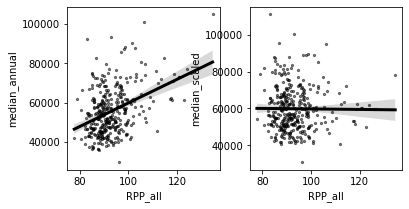

Automotive Body and Related Repairers


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


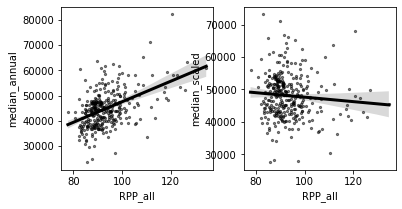

Postal Service Clerks


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


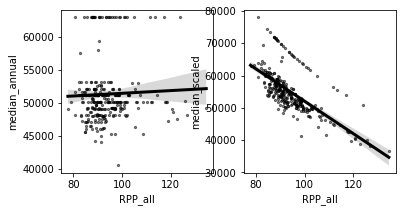

Plumbers, Pipefitters, and Steamfitters


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


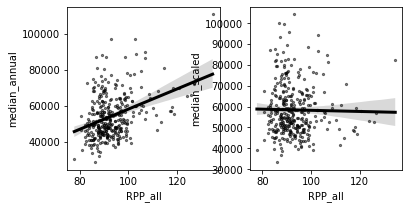

Janitors and Cleaners, Except Maids and Housekeeping Cleaners


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


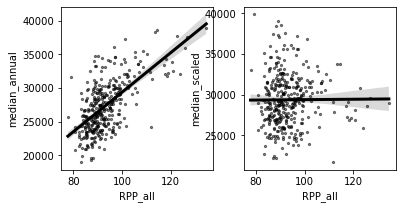

Carpenters


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


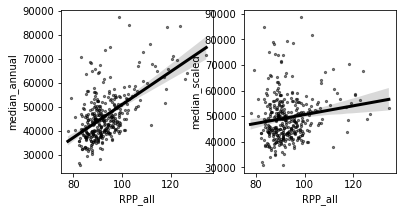

Lawyers


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


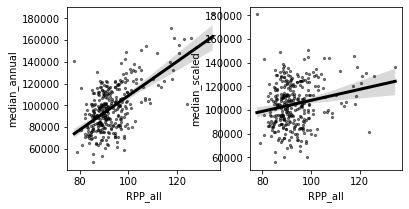

Waiters and Waitresses


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


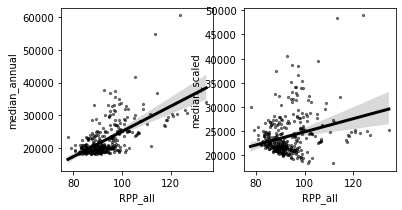

Secondary School Teachers, Except Special and Career/Technical Education


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


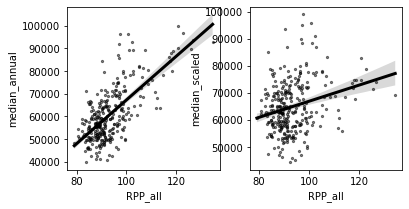

Elementary School Teachers, Except Special Education


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


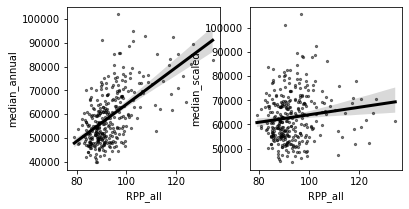

Accountants and Auditors


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


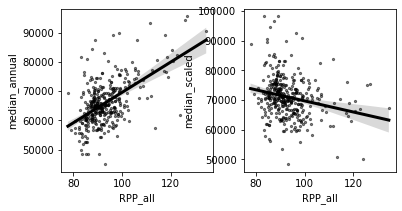

Retail Salespersons


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


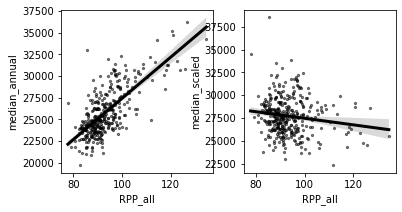

Nursing Assistants


<ipython-input-29-2c52eba09814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


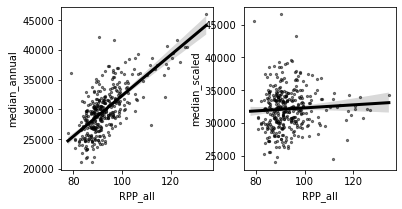

In [29]:
for occupation in occupation_list:
    print(occupation)
    occupation_df = metro_salary_df[metro_salary_df.OCC_TITLE == occupation]
    occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)
    
    fig, axs = plt.subplots(ncols=2, figsize=(6,3))
    ax = axs[0]
    sns.regplot(
        x="RPP_all",
        y="median_annual",
        data=occupation_df,
        ax=ax,
        color = 'k',
        scatter_kws={
            "alpha": 0.5,
            "s": 5,
        },
        line_kws = {
            'lw':3,

        }
    )
    ax = axs[1]
    sns.regplot(
        x="RPP_all",
        y="median_scaled",
        data=occupation_df,
        ax=ax,
        color = 'k',
        scatter_kws={
            "alpha": 0.5,
            "s": 5,
        },
        line_kws = {
            'lw':3,

        }
    )
    plt.show()
    #break

In [ ]:
[i for i in occupation_df.AREA_TITLE.values if 'Los Angeles' in i]

### List incomes for regions

In [50]:
regions_to_plot = [
    'San Francisco-Oakland-Hayward, CA',
    'Durham-Chapel Hill, NC',
    'Chicago-Naperville-Elgin, IL-IN-WI',
    'Los Angeles-Long Beach-Anaheim, CA'
    
]

In [ ]:
from IPython.display import display

In [56]:
for occupation in occupation_list:
    print(occupation)
    occupation_df = metro_salary_df[metro_salary_df.OCC_TITLE == occupation]
    occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)
    display(occupation_df[occupation_df.AREA_TITLE.isin(regions_to_plot)][['AREA_TITLE', 'median_annual']])

Electricians


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22720,"Chicago-Naperville-Elgin, IL-IN-WI",87630.0
35132,"Durham-Chapel Hill, NC",49950.0
69077,"Los Angeles-Long Beach-Anaheim, CA",74330.0
105585,"San Francisco-Oakland-Hayward, CA",104800.0


Automotive Body and Related Repairers


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22762,"Chicago-Naperville-Elgin, IL-IN-WI",47190.0
35157,"Durham-Chapel Hill, NC",45470.0
69122,"Los Angeles-Long Beach-Anaheim, CA",48270.0
105627,"San Francisco-Oakland-Hayward, CA",61050.0


Postal Service Clerks


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22676,"Chicago-Naperville-Elgin, IL-IN-WI",51150.0
35108,"Durham-Chapel Hill, NC",62980.0
69033,"Los Angeles-Long Beach-Anaheim, CA",47210.0
105542,"San Francisco-Oakland-Hayward, CA",49170.0


Plumbers, Pipefitters, and Steamfitters


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22726,"Chicago-Naperville-Elgin, IL-IN-WI",96910.0
35136,"Durham-Chapel Hill, NC",48220.0
69082,"Los Angeles-Long Beach-Anaheim, CA",55760.0
105590,"San Francisco-Oakland-Hayward, CA",110880.0


Janitors and Cleaners, Except Maids and Housekeeping Cleaners


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22584,"Chicago-Naperville-Elgin, IL-IN-WI",31010.0
35046,"Durham-Chapel Hill, NC",30730.0
68939,"Los Angeles-Long Beach-Anaheim, CA",32210.0
105457,"San Francisco-Oakland-Hayward, CA",38910.0


Carpenters


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22709,"Chicago-Naperville-Elgin, IL-IN-WI",84100.0
35127,"Durham-Chapel Hill, NC",38640.0
69065,"Los Angeles-Long Beach-Anaheim, CA",65630.0
105573,"San Francisco-Oakland-Hayward, CA",71520.0


Lawyers


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22363,"Chicago-Naperville-Elgin, IL-IN-WI",131440.0
34908,"Durham-Chapel Hill, NC",104730.0
68720,"Los Angeles-Long Beach-Anaheim, CA",161810.0
105258,"San Francisco-Oakland-Hayward, CA",183720.0


Waiters and Waitresses


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22575,"Chicago-Naperville-Elgin, IL-IN-WI",19890.0
35037,"Durham-Chapel Hill, NC",22480.0
68930,"Los Angeles-Long Beach-Anaheim, CA",29360.0
105448,"San Francisco-Oakland-Hayward, CA",34020.0


Secondary School Teachers, Except Special and Career/Technical Education


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22412,"Chicago-Naperville-Elgin, IL-IN-WI",79910.0
34924,"Durham-Chapel Hill, NC",52530.0
68766,"Los Angeles-Long Beach-Anaheim, CA",88850.0
105299,"San Francisco-Oakland-Hayward, CA",92940.0


Elementary School Teachers, Except Special Education


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22409,"Chicago-Naperville-Elgin, IL-IN-WI",65970.0
34922,"Durham-Chapel Hill, NC",48620.0
68764,"Los Angeles-Long Beach-Anaheim, CA",92480.0
105297,"San Francisco-Oakland-Hayward, CA",82870.0


Accountants and Auditors


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22240,"Chicago-Naperville-Elgin, IL-IN-WI",72960.0
34818,"Durham-Chapel Hill, NC",73720.0
68598,"Los Angeles-Long Beach-Anaheim, CA",74900.0
105141,"San Francisco-Oakland-Hayward, CA",90460.0


Retail Salespersons


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22626,"Chicago-Naperville-Elgin, IL-IN-WI",27300.0
35071,"Durham-Chapel Hill, NC",24620.0
68982,"Los Angeles-Long Beach-Anaheim, CA",31230.0
105498,"San Francisco-Oakland-Hayward, CA",34270.0


Nursing Assistants


<ipython-input-56-8161f5c935de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


,AREA_TITLE,median_annual
22527,"Chicago-Naperville-Elgin, IL-IN-WI",31100.0
35002,"Durham-Chapel Hill, NC",30720.0
68882,"Los Angeles-Long Beach-Anaheim, CA",37050.0
105405,"San Francisco-Oakland-Hayward, CA",46030.0


,AREA_TITLE,median_annual
22527,"Chicago-Naperville-Elgin, IL-IN-WI",31100.0
35002,"Durham-Chapel Hill, NC",30720.0
68882,"Los Angeles-Long Beach-Anaheim, CA",37050.0
105405,"San Francisco-Oakland-Hayward, CA",46030.0
